Proyek Analisis Data: Bike Sharing

# Menentukan Pertanyaan Bisnis



* 1. Pada bulan apa penyewaan sepeda mendapat order terbanyak dalam periode 1 tahun?
* 2. Pada Musim apa penyewaan sepeda mendapat order terbanyak dalam periode 1 tahun?
* 3. Apakah ada perbedaan antara hari kerja dan hari libur dalam jumlah sewa harian?
* 4. Apakah ada pola berdasarkan jam dalam jumlah sewa sepeda harian?


Menyiapkan Library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Data Wrangling

Gathering Data

In [2]:
! chmod 600 /content/kaggle.json

In [3]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 110MB/s]


In [4]:
zip_file = zipfile.ZipFile('/content/bike-sharing-dataset.zip', 'r')
zip_file.extractall('/content')

In [5]:
df_day = pd.read_csv("/content/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df_hour = pd.read_csv("/content/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Assessing Data

1. Menilai tabel df_day

In [7]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Mengecek missing Values
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Mengecek Data Duplikat
print('jumlah duplikasi data :',df_day.duplicated().sum())

jumlah duplikasi data : 0


2. Menilai tabel df_hour

In [10]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print(df_hour.shape)

(17379, 17)


In [12]:
# Mengecek missing Values
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# Mengecek Data Duplikat
print('jumlah duplikasi data :',df_hour.duplicated().sum())

jumlah duplikasi data : 0


Cleaning Data

Semua tipe data sudah sesuai dan tidak ada masalah

# Exploratory Data Analysis (EDA)

Merge Data frame

In [14]:
df_bike = df_hour.merge(df_day, on='dteday', how='inner', suffixes=('_hourly', '_daily'))
df_bike.head()

,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [15]:
# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
df_bike.season_hourly.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)
df_bike.season_daily.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
df_bike.yr_hourly.replace((0,1), (2011,2012), inplace=True)
df_bike.yr_daily.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
df_bike.mnth_hourly.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
df_bike.mnth_daily.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
df_bike.weathersit_hourly.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)
df_bike.weathersit_daily.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
df_bike.weekday_hourly.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
df_bike.weekday_daily.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)


# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
df_bike.workingday_hourly.replace((0,1), ('Hari Libur', 'Hari Kerja'), inplace=True)


In [16]:
df_bike.head()

,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,Hari Libur,Clear,...,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,Hari Libur,Clear,...,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,Hari Libur,Clear,...,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,Hari Libur,Clear,...,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,Hari Libur,Clear,...,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985


In [17]:
df_bike.describe(include="all")

,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379,17379,...,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,NaN,7,2,4,...,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Summer,NaN,May,NaN,NaN,Saturday,Hari Kerja,Clear,...,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,NaN,2512,11865,11413,...,2512,NaN,11040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,0.028770,NaN,NaN,NaN,...,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,0.167165,NaN,NaN,NaN,...,NaN,0.465431,NaN,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,0.000000,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,NaN,NaN,2012.000000,NaN,12.000000,0.000000,NaN,NaN,NaN,...,NaN,1.000000,NaN,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,NaN,NaN,2012.000000,NaN,18.000000,0.000000,NaN,NaN,NaN,...,NaN,1.000000,NaN,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000


Boxplot Pengguna Bike sharing Berdasarkan Bulan


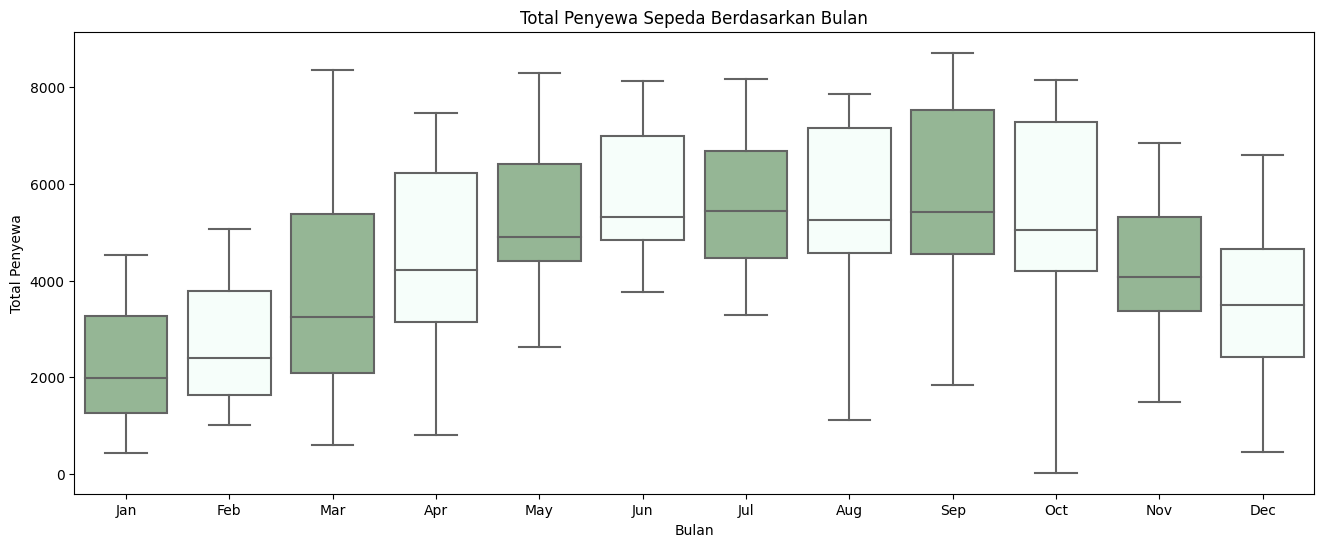

In [18]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="mnth_daily",
    y="cnt_daily",
    data=df_bike,
    palette=["Darkseagreen", "Mintcream"]
)

# Add labels and a title to the plot
plt.xlabel("Bulan")
plt.ylabel("Total Penyewa")
plt.title("Total Penyewa Sepeda Berdasarkan Bulan")

# Show the plot
plt.show()

* Bike sharing memiliki permintaan tertinggi pada periode bulan Juni hingga bulan September.



Boxplot Pengguna Bike sharing Berdasarkan Musim

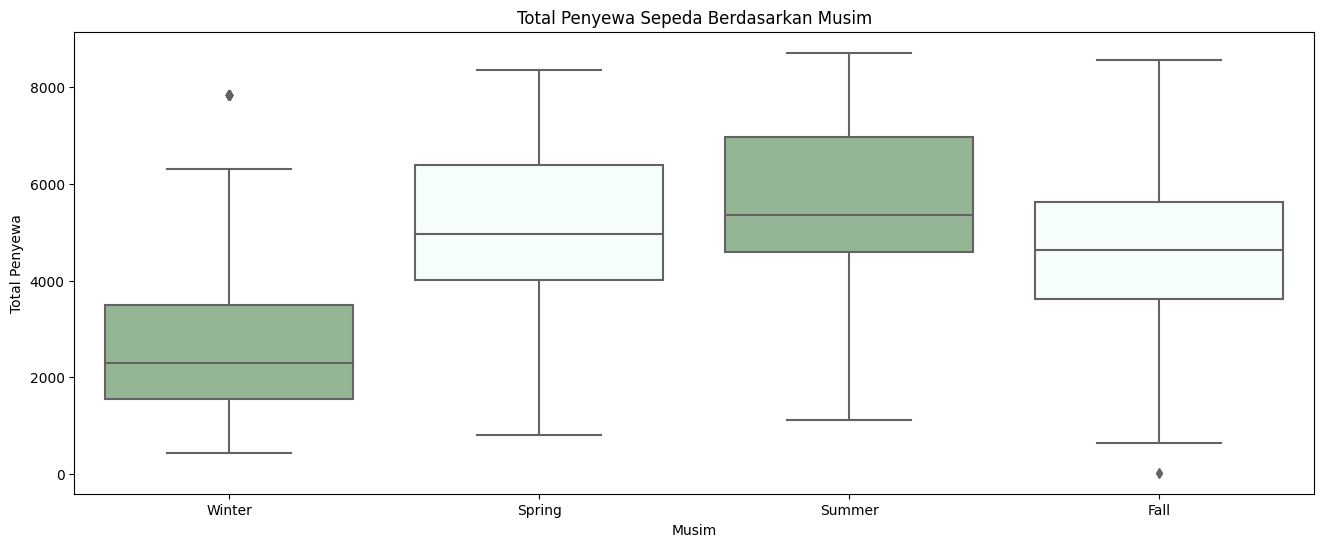

In [19]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season_daily",
    y="cnt_daily",
    data=df_bike,
    palette=["Darkseagreen", "Mintcream"]
)

# Add labels and a title to the plot
plt.xlabel("Musim")
plt.ylabel("Total Penyewa")
plt.title("Total Penyewa Sepeda Berdasarkan Musim")

# Show the plot
plt.show()

*   Bikesharing memiliki permintaan tertinggi pada musim Summer atau musim panas.

Pointplot Pengguna Bike Sharing Berdasarkan musim dan Jam

[Text(0.5, 1.0, 'Total Penyewa Berdasarkan Musim dan Jam')]

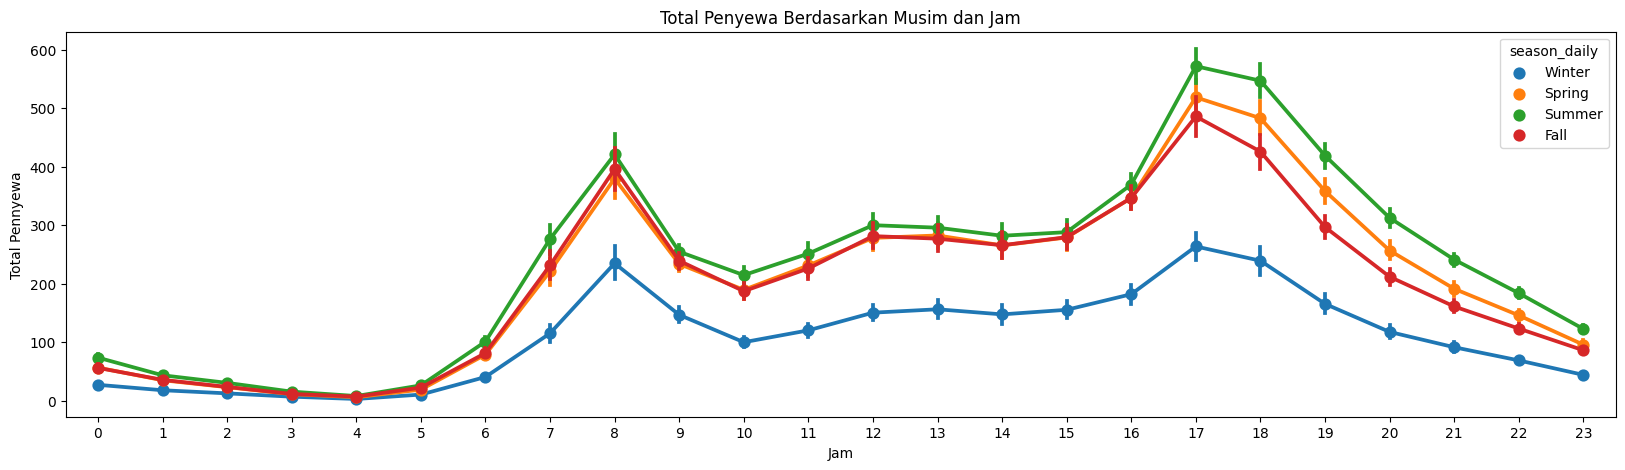

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df_bike, x='hr', y='cnt_hourly', hue='season_daily')
# Add labels and a title to the plot
plt.xlabel("Jam")
plt.ylabel("Total Pennyewa")
ax.set(title="Total Penyewa Berdasarkan Musim dan Jam")

*   Penyewaan sepeda memilik permintaan tertinggi pada jam 17.00 atau jam 5 pm pada setiap musim.
*   Penyewaan sepeda memilik permintaan tertinggi pada musim summer atau musim panas.



Boxplot Perbedaan jumlah sewa sepeda harian antara hari kerja dan hari libur

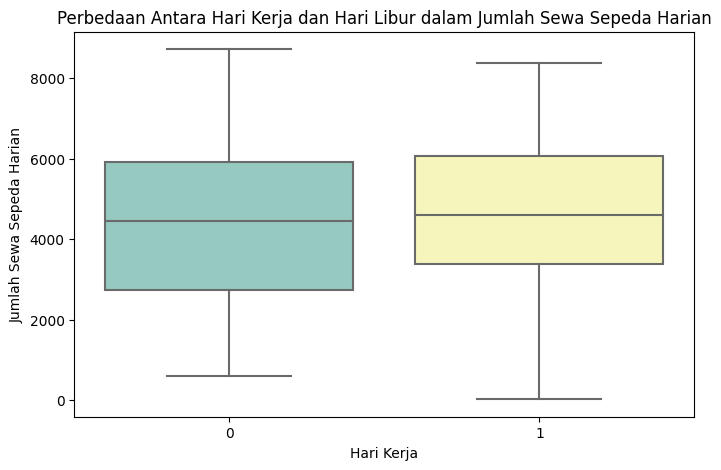

In [21]:
# Perbandingan hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday_daily", y="cnt_daily", data=df_bike, palette = "Set3")
plt.title("Perbedaan Antara Hari Kerja dan Hari Libur dalam Jumlah Sewa Sepeda Harian")
plt.xlabel("Hari Kerja")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

*   Terdapat perbedaan penyewaan sepeda antara hari kerja dan hari libur dimana penyewaan lebih banyak pada hari kerja

Barplot Penyewaan Sepeda Berdasarkan Hari

[Text(0.5, 1.0, 'Total Penyewa Sepeda Berdasarkan Hari')]

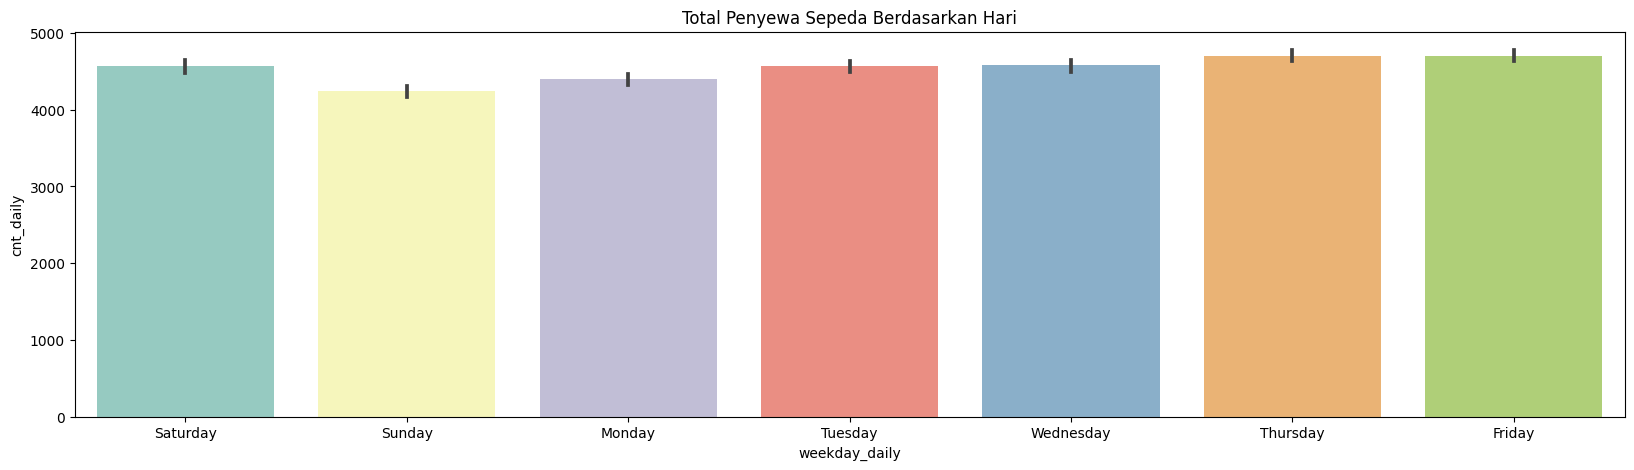

In [22]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df_bike, x='weekday_daily', y='cnt_daily', ax=ax, palette = "Set3")
ax.set(title='Total Penyewa Sepeda Berdasarkan Hari')

*   Total penyewaan terbanyak pada hari Thursday atau Kamis dan hari Friday atau Jumat

# Explanatory Data Analysis & Data Visualization

1. Pada bulan apa penyewaan sepeda mendapat order terbanyak dalam periode 1 tahun?

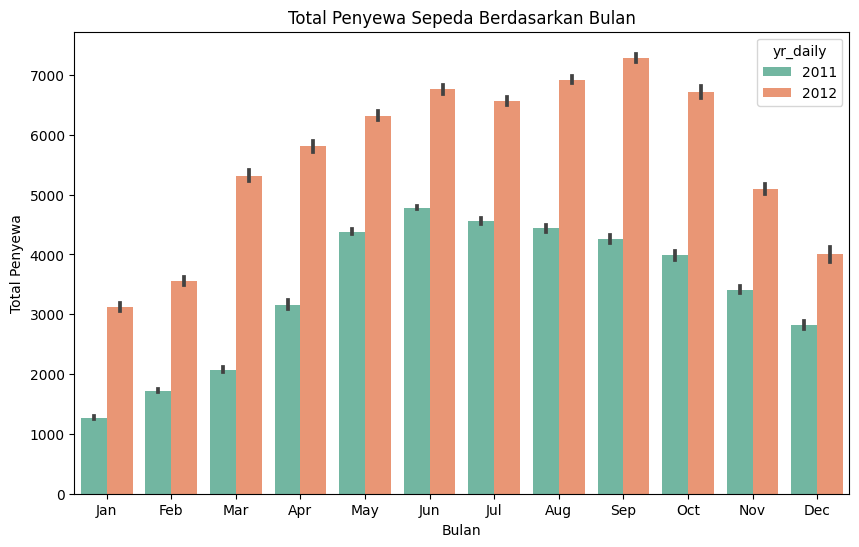

In [23]:
plt.figure(figsize=(10,6))

sns.barplot(x='mnth_daily', y='cnt_daily', data=df_bike, hue='yr_daily', palette = "Set2")

plt.xlabel("Bulan")
plt.ylabel("Total Penyewa")
plt.title("Total Penyewa Sepeda Berdasarkan Bulan")

plt.show()

*   Penyewaan sepeda memilik permintaan tertinggi pada bulan Juni untuk tahun 2011.
*  Penyewaan sepeda memiliki permintaan tertinggi pada bulan September untuk tahun 2012.






2. Pada musim apa penyewaan sepeda mendapat order terbanyak dalam periode 1 tahun?

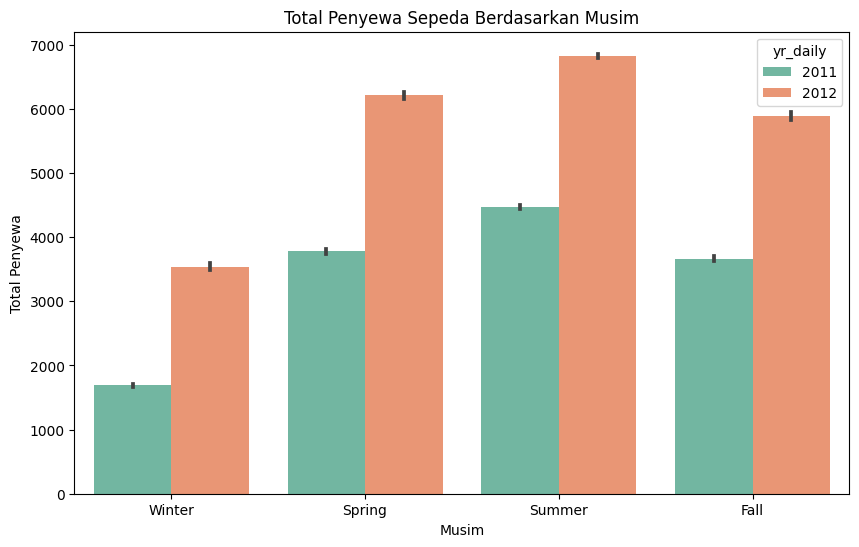

In [24]:
plt.figure(figsize=(10,6))

sns.barplot(x='season_daily', y='cnt_daily', data=df_bike, hue='yr_daily', palette = "Set2")

plt.xlabel("Musim")
plt.ylabel("Total Penyewa")
plt.title("Total Penyewa Sepeda Berdasarkan Musim")

plt.show()

*   Penyewaan sepeda memiliki permintaan tertinggi pada musim summer atau musim panas untuk tahun 2011 dan 2012

3. Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?

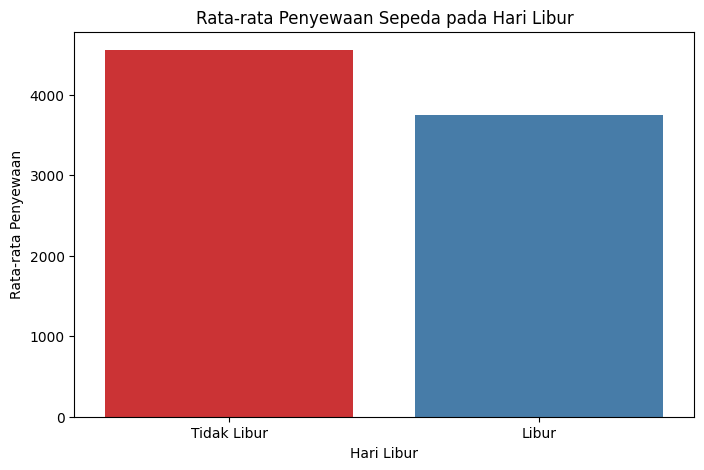

In [25]:
avg_holiday = df_bike.groupby('holiday_daily')['cnt_daily'].mean().reset_index().sort_values("cnt_daily")

plt.figure(figsize=(8, 5))
sns.barplot(x='holiday_daily', y='cnt_daily', data=avg_holiday, palette='Set1')

plt.title('Rata-rata Penyewaan Sepeda pada Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0, 1], ['Tidak Libur', 'Libur'])

plt.show()

*   Rata - rata penyewaan terjadi saat hari tidak libur ( Senin - Jumat )




4. Apakah ada pola berdasarkan jam dalam jumlah sewa sepeda harian?

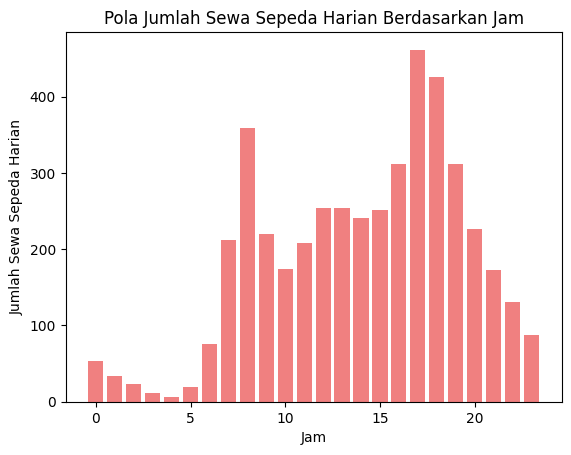

In [26]:
rental_jam = df_bike.groupby('hr')['cnt_hourly'].mean()

plt.bar(rental_jam.index, rental_jam.values, color='#F08080')

plt.title('Pola Jumlah Sewa Sepeda Harian Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sewa Sepeda Harian')

plt.show()

*   pada grafik diatas dapat dilihat bahwa waktu sewa lebih banyak terjadi pada sekitar jam 17.00 atau jam 5 pm

# Conclusion

1. Pada bulan apa penyewaan sepeda mendapat order terbanyak dalam periode 1 tahun?
*   penyewaan sepeda mendapat order terbanyak pada bulan Juni untuk tahun 2011 dan pada bulan September untuk tahun 2012.




2. Pada musim apa penyewaan sepeda mendapat order terbanyak dalam periode 1 tahun?
*   Musim summer atau musim panas merupakan musim yang memiliki penyewa sepeda terbanyak dalam periode 1 tahun.

3. Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?

*   Jumlah sewa sepeda lebih banyak ketika hari kerja daripada hari libur.
*   Total penyewaan terbanyak pada hari Thursday atau Kamis dan hari Friday atau Jumat

4. Apakah ada pola berdasarkan jam dalam jumlah sewa sepeda harian?

*   Jumlah sewa sepeda meningkat sekitar jam 17.00 atau jam 5 pm.